In [49]:
# Libraries

import os, shutil, keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Model

model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))


# Save model & summary

model.save('rps_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [3]:
# Compile model for training
from keras import optimizers

model.compile(loss='categorical_crossentropy', 
    optimizer =keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False),
    metrics=['acc'])

In [4]:
#directories with training, validation, test images (already split)

train_dir = os.path.abspath("/Users/Nadia/Desktop/FinalProject490/train")
validation_dir = os.path.abspath("/Users/Nadia/Desktop/FinalProject490/validation")
test_dir = os.path.abspath("/Users/Nadia/Desktop/FinalProject490/test")

#test_all_dir = os.path.abspath("/Users/Nadia/Desktop/FinalProject490/test0")

train_rock = os.path.join(train_dir, "train_rock")
train_paper = os.path.join(train_dir, "train_paper")
train_scissors = os.path.join(train_dir, "train_scissors")

validation_rock = os.path.join(validation_dir, "validation_rock")
validation_paper = os.path.join(validation_dir, "validation_paper")
validation_scissors = os.path.join(validation_dir, "validation_scissors")

test_rock = os.path.join(test_dir, "test_rock")
test_paper = os.path.join(test_dir, "test_paper")
test_scissors = os.path.join(test_dir, "test_scissors")


In [5]:
# data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  #target directory
    target_size = (150, 150),
    batch_size = 16,
    shuffle = True,
    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  #target directory
    target_size = (150, 150),
    batch_size = 16,
    shuffle = True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,  #target directory
    target_size = (150, 150),
    batch_size = 1,
 #   shuffle = True,
    class_mode = 'categorical')


Found 1531 images belonging to 3 classes.
Found 437 images belonging to 3 classes.
Found 220 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'train_paper': 0, 'train_rock': 1, 'train_scissors': 2}

In [7]:
test_generator.class_indices

{'test_paper': 0, 'test_rock': 1, 'test_scissors': 2}

In [8]:
# Run model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 91s 907ms/step - loss: 1.0704 - acc: 0.4245 - val_loss: 0.9329 - val_acc: 0.5691
Epoch 2/30
100/100 [==============================] - 66s 665ms/step - loss: 0.9836 - acc: 0.5273 - val_loss: 0.9166 - val_acc: 0.7121
Epoch 3/30
100/100 [==============================] - 81s 811ms/step - loss: 0.8446 - acc: 0.6439 - val_loss: 0.5965 - val_acc: 0.8753
Epoch 4/30
100/100 [==============================] - 67s 675ms/step - loss: 0.6243 - acc: 0.7743 - val_loss: 0.4155 - val_acc: 0.8612
Epoch 5/30
100/100 [==============================] - 68s 675ms/step - loss: 0.4783 - acc: 0.8458 - val_loss: 0.1760 - val_acc: 0.9480
Epoch 6/30
100/100 [==============================] - 64s 640ms/step - loss: 0.3705 - acc: 0.8777 - val_loss: 0.3796 - val_acc: 0.7995
Epoch 7/30
100/100 [==============================] - 51s 507ms/step - loss: 0.3840 - acc: 0.8690 - val_loss: 0.0681 - val_acc: 0.9769
Epoch 8/30
100/100 [==============================] - 6

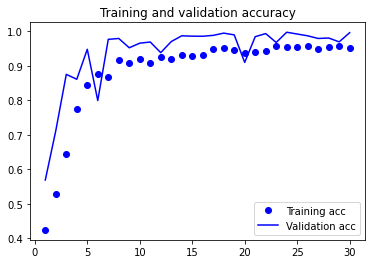

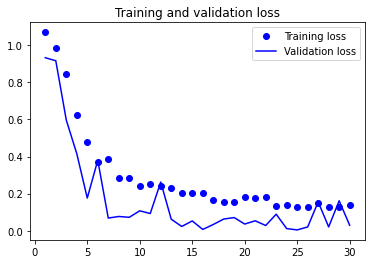

In [10]:
# display acc & loss curves during training and validation
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
# Validation accuracy
score, acc = model.evaluate_generator(validation_generator, steps=5)
print(acc)

1.0


In [13]:
# Testing accuracy
score, acc = model.evaluate_generator(test_generator, steps=5)
print(acc)

1.0
